In [1]:
import pandas as pd 

# Get county fipscode info

#fips = pd.read_csv(r"D:\JP\Covid19\fipscodes.csv", encoding = "ISO-8859-1", engine='python')
##fips = fips[fips.CountyCode != 0]
#fips.head()

#Get Diabetes Information from Excel file 
DiabetesStateLevel = pd.read_excel(r"D:\JP\Covid19\RiskFactors\IMHE_DiabetesPrevelance2012.xlsx", sheet_name = "StateData")
DiabetesStateLevel["StateFips"] = DiabetesStateLevel.StateFips.astype(str).str.zfill(2)
DiabetesStateLevel.head()

#Get County Level Subset
DiabetesCountyLevel = pd.read_excel(r"D:\JP\Covid19\RiskFactors\IMHE_DiabetesPrevelance2012.xlsx", sheet_name = "CountyData")#
DiabetesCountyLevel["FipsCode"] = DiabetesCountyLevel.FipsCode.astype(str).str.zfill(5)
#DiabetesCountyLevel.head()
# Add StateFips Column using the existing FipsCode column
StateFips = DiabetesCountyLevel['FipsCode'].str[:2]
DiabetesCountyLevel['StateFips'] = StateFips
#DiabetesCountyLevel.head()

# Create FipsLookUp dataframe for later joining 
MergeDF = pd.merge(DiabetesCountyLevel
                     , DiabetesStateLevel
                     , on = 'StateFips'
                     , how = 'inner')
FipsLookUp = MergeDF.drop('DiagnosedDiabetesPrevalence2012', axis = 1)
FipsLookUp = FipsLookUp.drop('DiabetesPrevalence2012', axis = 1)


# State Diabetes totals back into County Level Data to calculate above or below state averages
MergeDF['DiabetesComparedToStateTotal'] =  MergeDF['DiagnosedDiabetesPrevalence2012'] - MergeDF['DiabetesPrevalence2012'] 
DiabetesDF = MergeDF.rename(columns = {'DiagnosedDiabetesPrevalence2012':'PercentDiabetesCounty'})
DiabetesFinalDF = DiabetesDF.rename(columns = {'DiabetesPrevalence2012': 'PercentDiabetesState'})
DiabetesFinalDF.head()
DiabetesDF = DiabetesFinalDF[['StateName', 'CountyName', 'FipsCode', 'PercentDiabetesCounty', 'DiabetesComparedToStateTotal']]
FipsLookUp.head()
#FipsLookUp.set_index('FipsCode', inplace=True)
#FipsLookUp.loc['36047']
#FipsLookUp.head()
#DiabetesDF.set_index('FipsCode', inplace = True)
#DiabetesDF.loc['36047']

,CountyName,FipsCode,StateFips,StateName
0,Autauga County,01001,01,Alabama
1,Baldwin County,01003,01,Alabama
2,Barbour County,01005,01,Alabama
3,Bibb County,01007,01,Alabama
4,Blount County,01009,01,Alabama


In [200]:
# Get national, state and county level smoking data. Put together a final table that contains 
# County levels as compared to the National and State numbers.  

#import pandas as pd 

# read initial csv file
Smokers = pd.read_csv(r"D:\JP\Covid19\RiskFactors\CountyLevelSmokingPercentage.csv") 

# Work on State and National Dataframe
# drop unnecessary rowsfrom dataframe
Smokers = Smokers[Smokers.sex == 'Both']
SmokersStateandNational = Smokers[Smokers['county'].isna()]
SmokersStateandNational = SmokersStateandNational[SmokersStateandNational.year == 2012]

# Drop unneeded columns
SmokersStateandNational = SmokersStateandNational.drop(SmokersStateandNational.columns[5:],axis = 1)
SmokersStateandNational = SmokersStateandNational.drop('sex', axis = 1)
SmokersStateandNational = SmokersStateandNational.drop('county', axis = 1)
#SmokersStateandNational.head()

# Get County Numbers
# drop unnecessary rowsfrom dataframe
Smokers = Smokers[Smokers['county'].notna()]
Smokers = Smokers[Smokers.year == 2012]


# Drop unneeded columns
Smokers = Smokers.drop(Smokers.columns[5:],axis = 1)
Smokers = Smokers.drop('sex', axis = 1)

# rename total_mean column
Smokers.rename(columns = {'total_mean':'PercentSmokersCounty'}, inplace = True)


# merge
Merge = pd.merge(Smokers
                , SmokersStateandNational
                , on = 'state'
                , how = 'inner')
MergewFips = pd.merge(Merge
                     , FipsLookUp
                     , left_on = ['state','county']
                     , right_on = ['StateName', 'CountyName']
                     , how = 'inner'
                     )
MergewFips = MergewFips.drop('year_y', axis = 1)
MergewFips.rename(columns = {'total_mean' : 'PercentSmokersStateLevel'}, inplace = True)
MergewFips.rename(columns = {'year_x':'year'}, inplace = True)
MergewFips['SmokersComparedtoStateLevel'] =  MergewFips['PercentSmokersCounty'] - MergewFips['PercentSmokersStateLevel']
SmokersDF = MergewFips[['state', 'county', 'FipsCode', 'PercentSmokersCounty', 'SmokersComparedtoStateLevel']]
SmokersDF.rename(columns = {'county':'CountyName'}, inplace = True)
SmokersDF.rename(columns = {'state' :'StateName'}, inplace = True)
SmokersDF.head()

,StateName,CountyName,FipsCode,PercentSmokersCounty,SmokersComparedtoStateLevel
0,Alabama,Autauga County,01001,25.10,1.21
1,Alabama,Baldwin County,01003,20.90,-2.99
2,Alabama,Barbour County,01005,26.25,2.36
3,Alabama,Bibb County,01007,29.41,5.52
4,Alabama,Blount County,01009,27.17,3.28


In [318]:
# Get Elderly Data
Elderly = pd.read_excel(r"D:\JP\Covid19\RiskFactors\ElderlybyCounty.xlsx", sheet_name = "Sheet1", \
                        skiprows = range(1, 2), header = 1, dtype={'Countyfips': object})
Elderly.rename(columns = {'PercentofTotalPop':'PercentofTotalPop65+'}, inplace = True)
Elderly['PercentofTotalPop65+'] = Elderly['PercentofTotalPop65+'] * 100
Elderly['PercentofTotalPop65+'] = Elderly['PercentofTotalPop65+'].astype(float).round(2)
Elderly.head()

,Countyfips,CountyPopulation2017,countypopulation2010,Pop_65andOver_2010,PercentofTotalPop65+
0,01001,56319,54571,6546,12.01
1,01003,209227,182265,30568,16.77
2,01005,27072,27457,3909,14.23
3,01007,22932,22915,2906,12.66
4,01009,57596,57322,8439,14.72


In [319]:
Respiratory = pd.read_excel(r"D:\JP\Covid19\RiskFactors\ChronicRespiratoryDiseaseMortalityRatebyCounty.xlsx", \
                        sheet_name = "Chronic respiratory diseases", skiprows = 0, header = 1, usecols = "A:B,J", \
                          dtype={'FIPS': object})
Respiratory.rename(columns = {'Mortality Rate, 2014*':'RespiratoryDiseaseMortality2014'}, inplace = True)
# Get only the county level numbers and drop the state and national from the dataframe
Respiratory = Respiratory[Respiratory['FIPS'] > 2]
Respiratory['RespiratoryDiseaseMortality2014'] = Respiratory['RespiratoryDiseaseMortality2014'].str.replace(r"\(.*\)","")
Respiratory['RespiratoryDiseaseMortality2014'] = Respiratory['RespiratoryDiseaseMortality2014'].astype(float)
Respiratory['FIPS'] = Respiratory.FIPS.astype(str).str.zfill(5)
Respiratory.head()

,Location,FIPS,RespiratoryDiseaseMortality2014
2,"Autauga County, Alabama",01001,81.79
3,"Baldwin County, Alabama",01003,54.28
4,"Barbour County, Alabama",01005,69.82
5,"Bibb County, Alabama",01007,84.49
6,"Blount County, Alabama",01009,87.05


In [322]:
# Create a final master health info dataframe

temp = pd.merge(FipsLookUp
                     , Elderly[['Countyfips', 'countypopulation2010','PercentofTotalPop65+']]
                     , left_on = 'FipsCode'
                     , right_on = 'Countyfips'
                     , how = 'left'
                     )
temp1 = pd.merge(temp
                     , DiabetesDF[['FipsCode','PercentDiabetesCounty']]
                     , on = 'FipsCode'
                     , how = 'left'
                     )

temp2 = pd.merge(temp1
                     , SmokersDF[['FipsCode','PercentSmokersCounty']]
                     , on = 'FipsCode'
                     , how = 'left'
                     )
RiskFactors = pd.merge(temp2
                     , Respiratory[['FIPS', 'RespiratoryDiseaseMortality2014']]
                     , left_on = 'Countyfips'
                     , right_on = 'FIPS'
                     , how = 'left'
                     )
RiskFactors.head()

## Drop extra join fields
RiskFactors = RiskFactors.drop('Countyfips', axis = 1)
RiskFactors = RiskFactors.drop('FIPS', axis = 1)
#RiskFactors = RiskFactors.drop('fips', axis = 1)


,CountyName,FipsCode,StateFips,StateName,Countyfips,countypopulation2010,PercentofTotalPop65+,PercentDiabetesCounty,PercentSmokersCounty,FIPS,RespiratoryDiseaseMortality2014
0,Autauga County,01001,01,Alabama,01001,54571,12.01,11.44,25.10,01001,81.79
1,Baldwin County,01003,01,Alabama,01003,182265,16.77,9.76,20.90,01003,54.28
2,Barbour County,01005,01,Alabama,01005,27457,14.23,14.65,26.25,01005,69.82
3,Bibb County,01007,01,Alabama,01007,22915,12.66,12.32,29.41,01007,84.49
4,Blount County,01009,01,Alabama,01009,57322,14.72,11.14,27.17,01009,87.05


In [323]:
# Deal with New York  - Make a  dataframe of the health data for separate boroughs
temp = RiskFactors
temp.set_index('FipsCode', inplace = True)
NewYorkFix =  temp.loc[['36005', '36047', '36061', '36081', '36085']]

# Convert percent to decimal for multiplications
PercentEld = NewYorkFix['PercentofTotalPop65+'] / 100
PercentDia = NewYorkFix['PercentDiabetesCounty'] / 100
PercentSmoke = NewYorkFix['PercentSmokersCounty'] / 100
NewYorkFix['PercentofTotalPop65+'] = PercentEld
NewYorkFix['PercentDiabetesCounty'] = PercentDia
NewYorkFix['PercentSmokersCounty'] = PercentSmoke
NewYorkFix

,CountyName,StateFips,StateName,Countyfips,countypopulation2010,PercentofTotalPop65+,PercentDiabetesCounty,PercentSmokersCounty,FIPS,RespiratoryDiseaseMortality2014
FipsCode,,,,,,,,,,
36005,Bronx County,36,New York,36005,1385108,0.1053,0.1484,0.2028,36005,31.58
36047,Kings County,36,New York,36047,2504700,0.1149,0.1199,0.1846,36047,23.05
36061,New York County,36,New York,36061,1585873,0.1350,0.0885,0.1419,36061,23.47
36081,Queens County,36,New York,36081,2230722,0.1283,0.1144,0.1646,36081,24.13
36085,Richmond County,36,New York,36085,468730,0.1266,0.0912,0.2010,36085,34.76


In [331]:
# Create single row aggregates of NY boroughs
# Get total population
TotalPopNYC = NewYorkFix['countypopulation2010'].sum()
TotalPopNYC
     
# Elderly Aggregate
NYElderlybyBorough = (NewYorkFix['countypopulation2010'] * NewYorkFix['PercentofTotalPop65+'])
NYElderly = NYElderlybyBorough.sum().round(0).astype('int64') / NewYorkFix['countypopulation2010'].sum() * 100
NYElderly =  NYElderly.round(4) 
NYElderly

# Diabetes Aggregate
NYDiabetesbyBorough = (NewYorkFix['countypopulation2010'] * NewYorkFix['PercentDiabetesCounty'])
NYDiabetes = NYDiabetesbyBorough.sum().round(0).astype('int64') / NewYorkFix['countypopulation2010'].sum() * 100
NYDiabetes = NYDiabetes.round(2) 
NYDiabetes

# Smokers Aggregate
NYSmokersbyBorough = (NewYorkFix['countypopulation2010'] * NewYorkFix['PercentSmokersCounty'])
NYSmokers = NYSmokersbyBorough.sum().round(0).astype('int64') / NewYorkFix['countypopulation2010'].sum() * 100
NYSmokers = NYSmokers.round(2) 
NYSmokers

# Respiratory Disease Aggregate
NYRespiratorybyBorough = (NewYorkFix['countypopulation2010'] * NewYorkFix['RespiratoryDiseaseMortality2014'])
NYMortalityRate = NYRespiratorybyBorough.sum().round(0).astype('int64') / (NewYorkFix['countypopulation2010'].sum())
NYMortalityRate = NYMortalityRate.round(2)
NYMortalityRate

# Create a single row dataframe to replace the NY boroughs with a New York City row
data = {'FipsCode' : '36999', 'CountyName' : 'New York City', 'StateFips' : '36', 'StateName' : 'New York', \
        'countypopulation2010' : TotalPopNYC, 'PercentofTotalPop65+' : NYElderly, 'PercentDiabetesCounty' : NYDiabetes, \
        'PercentSmokersCounty' : NYSmokers, 'RespiratoryDiseaseMortality2014' : NYMortalityRate}
NYAggregates = pd.DataFrame(data, index = [0])

NYAggregates.set_index('FipsCode', inplace = True)
#RiskFactors.set_index('FipsCode', inplace = True)

# Append this New York City row to FinalDF 
FinalRiskFactors = pd.concat([RiskFactors, NYAggregates], sort = False)
FinalRiskFactors.head()

# remove individual borough records as NYAggregates is a replacement for them.
#FinalRiskFactors.drop(df.index[36005, 36047, 36061, 36081, 36085])
#FinalRiskFactors[FinalRiskFactors.FipsCode != '36005']
FinalRiskFactors = FinalRiskFactors.drop('FIPS', axis = 1)

In [334]:
# Get case totals
Cases = pd.read_excel(r"D:\JP\Covid19\Covid19Data_May1.xlsx", dtype = {'fips': object})
Cases.head()

FinalDF = pd.merge(FinalRiskFactors
                  , Cases[['fips', 'cases', 'deaths']]
                  , left_on = 'FipsCode'
                  , right_on = 'fips'
                  , how = 'left'
                  )

FinalDF.rename(columns = {'cases': 'CasesbyMay1'}, inplace = True)
FinalDF.rename(columns = {'deaths' : 'DeathsbyMay1'}, inplace = True)
FinalDF.rename(columns = {'fips' : 'CountyFips'}, inplace = True)

## Convert deaths and cases to int
FinalDF.fillna(0, inplace = True)
FinalDF['countypopulation2010'] = FinalDF['countypopulation2010'].astype('int64')
FinalDF['CasesbyMay1'] = FinalDF['CasesbyMay1'].astype('int64')
FinalDF['DeathsbyMay1'] = FinalDF['DeathsbyMay1'].astype('int64')

## Create a PatientDensity field
PatientDensity = FinalDF['CasesbyMay1'] * 1000 / FinalDF['countypopulation2010']
FinalDF['PatientDensityPer1000'] = PatientDensity.round(2)

# Create DeathPer1000
Deaths = FinalDF['DeathsbyMay1'] * 1000 / FinalDF['countypopulation2010']
FinalDF['DeathsPer1000'] = Deaths.round(2)

# Drop unneeded column
FinalDF = FinalDF.drop('Countyfips', axis = 1)

file_name = r"D:\JP\Covid19\CoronaData.csv"
FinalDF['CountyFips'] = FinalDF['CountyFips'].astype('str')
FinalDF.to_csv(file_name, index = False)


Text(0, 0.5, 'Deaths')

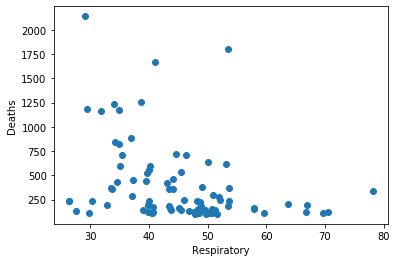

In [355]:
# mess with plotting
%matplotlib inline
import matplotlib.pyplot as plt

DeathsGT0 = FinalDF[FinalDF.DeathsbyMay1 > 100]
NonZeroDeaths = DeathsGT0[DeathsGT0.DeathsbyMay1 < 10000]


plt.scatter(NonZeroDeaths.RespiratoryDiseaseMortality2014, NonZeroDeaths.DeathsbyMay1)
plt.xlabel('Respiratory')
plt.ylabel('Deaths')

#NonZeroDeaths.corr(method ='pearson')